# Imports

In [1]:
import sys, gym
sys.path.append('../..')
from markov.Policies import EpsilonGreedyPolicy, DecayingEpsilonGreedyPolicy, RandomPolicy
from markov.Policies.DQNPolicy import DQNPolicy, BuildModel
from markov.Training import Agent, Academy
from markov.Metrics import CumulativeRewardFactory, EpisodeReward
from markov.Training import AgentConfig, AgentMetrics

2024-03-14 16:32:20.256028: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Training

#### Actual Training

In [2]:
training_env = gym.make("Taxi-v3")

agent_configs = {
    # "RandomWitness": AgentConfig(
    #     policy   = RandomPolicy()
    # ),
    "DQN-a0.01": AgentConfig(
        policy   = DecayingEpsilonGreedyPolicy(
            epsilon             = 1,
            exploration_policy  = RandomPolicy(),
            exploitation_policy = DQNPolicy(
                nn          = BuildModel(
                    training_env.observation_space.n, 
                    training_env.action_space.n, 
                    0.01,
                ),
                target_nn   = BuildModel(
                    training_env.observation_space.n, 
                    training_env.action_space.n, 
                    0.01
                ),
                target_update_period    = 10,
                train_every             = 1000,
                logging                 = False,
            ),
            decay_factor    = 0.99985,
            min_epsilon     = 0.1
        ),
    ),
}

academy = Academy(
    env     = training_env,
    agents  = agent_configs,
    metrics = AgentMetrics(
        step_metrics    = { "CumulativeReward"  : CumulativeRewardFactory() },
        episode_metrics = { "EpisodeReward"     : EpisodeReward }
    )
)
training_metrics = academy.Train(100) # 5mn ~= 50 episodes 
academy.closeEnvs()


2024-03-14 16:32:23.393173: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-14 16:32:23.546164: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-14 16:32:23.546525: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-14 16:32:23.547033: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in 

Training agent DQN-a0.01:
	Episode n°0
exploring
exploring
exploiting


2024-03-14 16:32:26.861404: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


exploring
exploring
exploring
exploring
exploring
exploring
exploring
exploring
exploring
exploiting
exploring
exploring
exploiting
exploring
exploring
exploring
exploring
exploring
exploring
exploiting
exploiting
exploring
exploring
exploring
exploring
exploring
exploring
exploiting
exploiting
exploiting
exploring
exploiting
exploiting
exploring
exploiting
exploiting
exploiting
exploiting
exploiting
exploiting
exploring
exploring
exploring
exploring
exploiting
exploiting
exploiting
exploring
exploiting
exploiting
exploring
exploring
exploiting
exploring
exploiting
exploring
exploiting
exploiting
exploiting
exploiting
exploiting
exploiting
exploiting
exploiting
exploiting
exploiting
exploiting
exploiting
exploring
exploring
exploiting
exploiting
exploiting
exploring
exploring
exploiting
exploring
exploiting
exploiting
exploiting
exploring
exploiting
exploiting
exploiting
exploiting
exploiting
exploring
exploiting
exploiting
exploiting
exploring
exploiting
exploiting
exploiting
exploiti

KeyboardInterrupt: 

#### Compare agent training stats

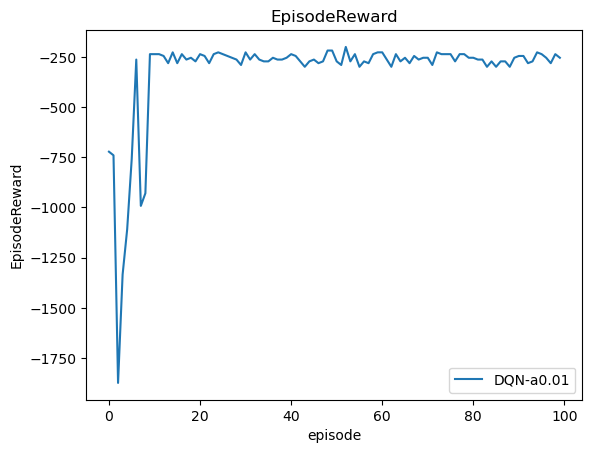

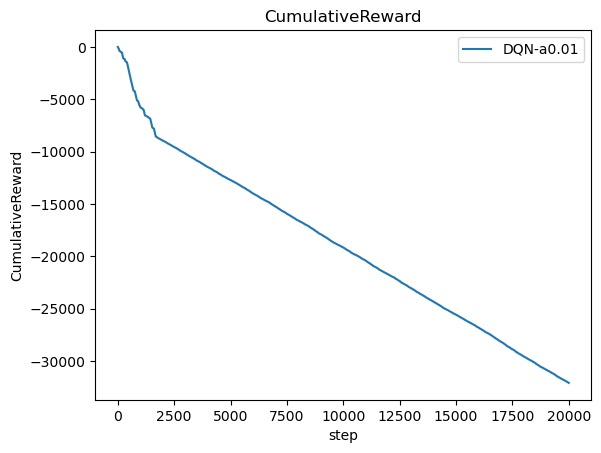

In [3]:
import matplotlib.pyplot as plt
from markov.Comparison import PlotMetricsComparison

PlotMetricsComparison(
    agent_metrics   = training_metrics,
    type            = "episode",
    step            = 1
)

PlotMetricsComparison(
    agent_metrics   = training_metrics,
    type            = "step",
    step            = 1
)


Notes:
- The CumulativeReward plot of each agent starts where the previous stopped because of an implementation mistake (every agent uses the same closure returned by CumulativeRewardFactory(), therefore using the same accumulator variable ) 
- every agent is trained the same number of episodes, but those learning quicker use less steps since they win each episode faster

# Tests

#### Test a specific agent (Renderer)

In [5]:
from markov.Metrics import EpisodeTerminated
from markov.Training import AgentMetrics

AGENT_TO_TEST   = "DQN-a0.01"
EPISODES        = 1

In [6]:
inference_env = gym.make("Taxi-v3", render_mode="human")

inference_metrics = academy.Infere(
    env         = inference_env,
    episodes    = EPISODES,
    agent_name  = AGENT_TO_TEST,
)

/root/miniconda3/envs/gym/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


state 311 + action 3 => state 311 and reward -1 (On-Going)
state 311 + action 3 => state 311 and reward -1 (On-Going)
state 311 + action 3 => state 311 and reward -1 (On-Going)
state 311 + action 3 => state 311 and reward -1 (On-Going)
state 311 + action 3 => state 311 and reward -1 (On-Going)
state 311 + action 3 => state 311 and reward -1 (On-Going)
state 311 + action 3 => state 311 and reward -1 (On-Going)
state 311 + action 3 => state 311 and reward -1 (On-Going)
state 311 + action 3 => state 311 and reward -1 (On-Going)
state 311 + action 3 => state 311 and reward -1 (On-Going)
state 311 + action 3 => state 311 and reward -1 (On-Going)
state 311 + action 3 => state 311 and reward -1 (On-Going)
state 311 + action 3 => state 311 and reward -1 (On-Going)
state 311 + action 3 => state 311 and reward -1 (On-Going)
state 311 + action 3 => state 311 and reward -1 (On-Going)
state 311 + action 3 => state 311 and reward -1 (On-Going)
state 311 + action 3 => state 311 and reward -1 (On-Goin

In [7]:
inference_env.close()

#### Compare agents

In [8]:
from markov.Metrics import EpisodeTerminated
from markov.Training import AgentMetrics

# inference_env = gym.make("Taxi-v3", render_mode="human")
inference_env = gym.make("Taxi-v3")

inference_metrics = academy.Infere(
    env         = inference_env,
    episodes    = 10,
    metrics     = AgentMetrics(
        episode_metrics = { 
            "EpisodeReward" : EpisodeReward,
            "EpisodeWon"    : EpisodeTerminated,
        }
    )
)
inference_env.close()

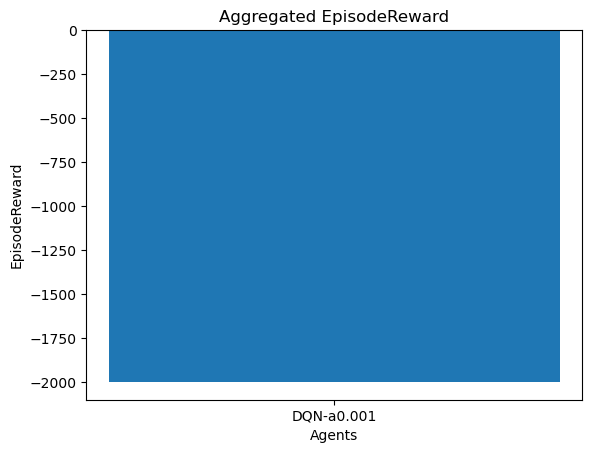

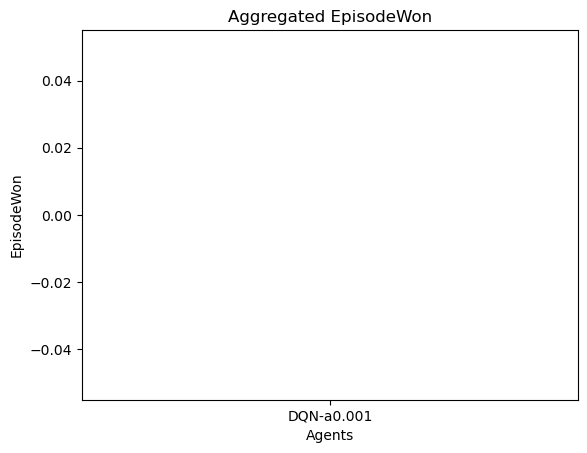

In [9]:
import matplotlib.pyplot as plt
from markov.Comparison import BarAggregatedMetricsComparison, PlotMetricsComparison

BarAggregatedMetricsComparison(
    agent_metrics   = inference_metrics,
    type            = "episode",
    agg             = sum
)


# Conclusion
